In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# prepare object points
nx = 9# enter the number of inside corners in x
ny = 6# enter the number of inside corners in y

objp  = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

In [ ]:
objp.shape

In [ ]:
import matplotlib.pyplot as plt
import glob
import cv2
import pickle


objpoints =[]
imgpoints =[]
print ( " .. starting  ")

plt.axis('off')
i = 0
for fname in glob.glob("./camera_cal/*"):
#     print (name)\
    img = cv2.imread(fname)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True:
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        objpoints.append(objp)
        imgpoints.append(corners )


    i += 1
    plt.axis('off')
#     plt.imshow(img)
#     plt.show()

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)


# Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "wide_dist_pickle.p", "wb" ) )    
print ( " .. completed .. saved into wide_dist_pickle.p  ")

## Working on test image

In [6]:
import matplotlib.pyplot as plt
import glob
import cv2
import pickle


# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
print ( " mtx.shape = " + str(mtx.shape) )

 mtx.shape = (3, 3)


In [310]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class save_images ( object ):
    def __init__( self ):
        self.i = 0
    def __call__( self, image):
        # do something
        self.i +=1
        cv2.imwrite("test_images2/image" + str(self.i) + ".jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        return image
    
save_images = save_images()    
    
## creating additional test images
from moviepy.editor import VideoFileClip
output_video_name = 'challenge_video_output.mp4'
clip1 = VideoFileClip("challenge_video.mp4")
clip2 = clip1.subclip(0,2)
output_video = clip2.fl_image(save_images) #NOTE: this function expects color images!!

%time output_video.write_videofile(output_video_name, audio=False)


class save_images ( object ):
    def __init__( self ):
        self.i = 0
    def __call__( self, image):
        # do something
        self.i +=1
        cv2.imwrite("test_images3/image" + str(self.i) + ".jpg", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
        return image
    
save_images = save_images()    
    
## creating additional test images
from moviepy.editor import VideoFileClip
output_video_name = 'project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
clip2 = clip1.subclip(0,2)
output_video = clip2.fl_image(save_images) #NOTE: this function expects color images!!

%time output_video.write_videofile(output_video_name, audio=False)






[MoviePy] >>>> Building video challenge_video_output.mp4
[MoviePy] Writing video challenge_video_output.mp4


100%|██████████| 60/60 [00:02<00:00, 19.93it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: challenge_video_output.mp4 

CPU times: user 4.4 s, sys: 72 ms, total: 4.47 s
Wall time: 3.41 s
[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


 98%|█████████▊| 50/51 [00:01<00:00, 20.65it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 3.64 s, sys: 40 ms, total: 3.68 s
Wall time: 3.01 s


In [461]:
test_image = cv2.imread("test_images3/image10.jpg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

### undistorting

In [462]:
undst = cv2.undistort(test_image, mtx, dist, None, mtx)
undst = np.copy(test_image)

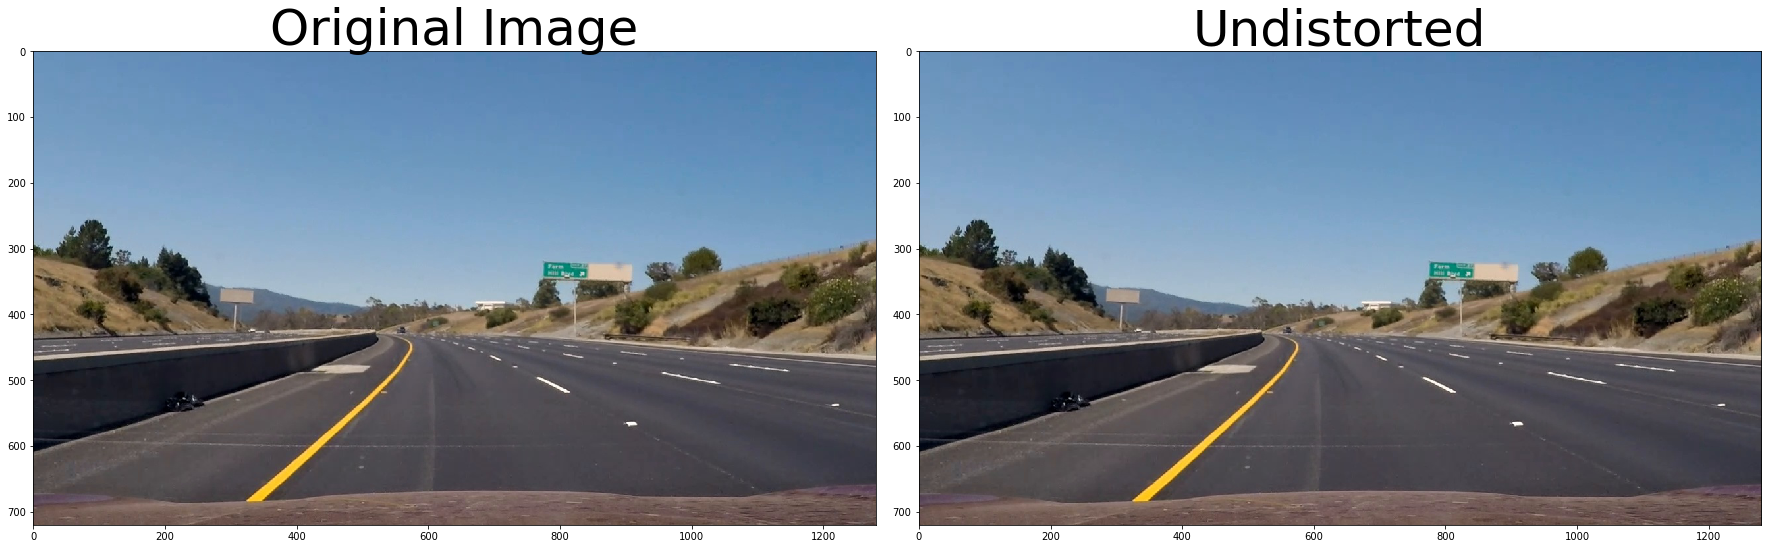

In [463]:
# top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_image)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(undst)
ax2.set_title('Undistorted', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()

In [470]:
x_len = undst.shape[1]
y_len = undst.shape[0]

#######    
## calculate the source points for image warp ( bird eyes view )
#######    
src_top_left     = [int(0.4353125*x_len),int(0.65*y_len)]
src_top_right    = [int(0.5778125*x_len),int(0.65*y_len)]

src_bottom_left  = [int(0.19171875*x_len),y_len]
src_bottom_right = [int(0.92*x_len),y_len]

src_corners = np.float32([src_top_left,
                      src_top_right,
                      src_bottom_right,
                      src_bottom_left])




In [471]:
tuple(src_corners[0])

(557.0, 468.0)

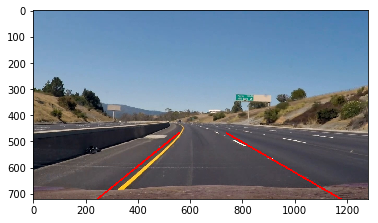

In [472]:
def draw_poly (img, src_corners):
    img_draw = np.copy(img)
#     print ( src_corners[0][0])
#     print (src_corners[0][1])
    cv2.line(img_draw,tuple(src_corners[0]),
                      tuple(src_corners[3]),
                       (255,0,0),5)

    cv2.line(img_draw,tuple(src_corners[1]),
                      tuple(src_corners[2]),
                       (255,0,0),5)

    return img_draw
drawed_poly = draw_poly(np.copy(undst), src_corners)
plt.imshow(drawed_poly)
plt.show()

In [475]:
def bird_eyes (image , src_corners, dst_corners) :
    
    M = cv2.getPerspectiveTransform(src_corners, dst_corners)
    Minv = cv2.getPerspectiveTransform(dst_corners, src_corners)
    warped = cv2.warpPerspective(image, M, ( image.shape[1], image.shape[0]), flags=cv2.INTER_LINEAR)

    return warped, M, Minv


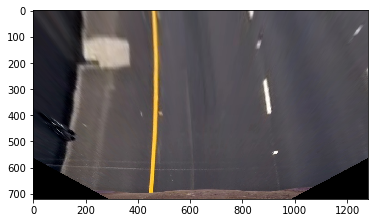

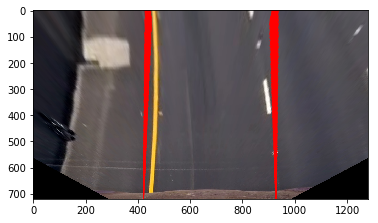

... Completed


In [484]:
#######    
## calculate the destination points for image warp ( bird eyes view )
#######    
dst_bottom_left = [int(.33*x_len),y_len] 
dst_bottom_right = [int(0.725*x_len), y_len]

dst_top_left = [int(.345*x_len), 1]
dst_top_right = [int(0.71875*x_len), 1]

dst_corners = np.float32([dst_top_left,
                          dst_top_right,
                          dst_bottom_right, 
                          dst_bottom_left
                         ])


warped , M, Minv = bird_eyes(undst,src_corners, dst_corners)
plt.imshow(warped)
plt.show()

warped_drawed , M_drawed, Minv_drawed = bird_eyes(drawed_poly,src_corners, dst_corners)
plt.imshow(warped_drawed)
plt.show()


print ("... Completed")


## cutting only an interesting area


In [485]:
def calc_vertices( img):
    imshape = img.shape

    vertices = np.array([[(.2*imshape[1],imshape[0]),            # <-- bottom left
                      (.2*imshape[1] ,  0*imshape[0]),            # <-- top left
                      (.8*imshape[1],  0*imshape[0]),             # <-- top right
                      (.8*imshape[1],imshape[0])]], dtype=np.int32)  # <-- bottom right

    return vertices

In [533]:
def region_of_interest(img):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    
   #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, calc_vertices(img), ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

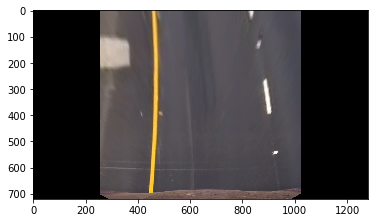

In [534]:
area_of_interest = region_of_interest (warped)
plt.imshow(area_of_interest)
plt.show()


### experimenting thresholds
#### Soebel X on the gray image

In [537]:
gray = cv2.cvtColor(warped, cv2.COLOR_RGB2GRAY)

In [538]:
# Sobel x
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

# Threshold x gradient
thresh_min = 20

thresh_max = 100
soebelx_binary = np.zeros_like(scaled_sobel)
soebelx_binary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1



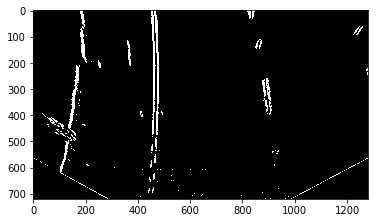

In [539]:
temp = np.dstack(( soebelx_binary, soebelx_binary, soebelx_binary)) * 255
plt.imshow(temp)
plt.show()

### Choosing the best HLS channel

In [544]:
# Convert to HLS color space and separate the V channel
hls = cv2.cvtColor(warped, cv2.COLOR_RGB2HLS).astype(np.float)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
h_channel_color = np.dstack((h_channel, h_channel, h_channel)) #*255
l_channel_color = np.dstack((l_channel, l_channel, l_channel)) #*255
s_channel_color = np.dstack((s_channel, s_channel, s_channel)) #*255

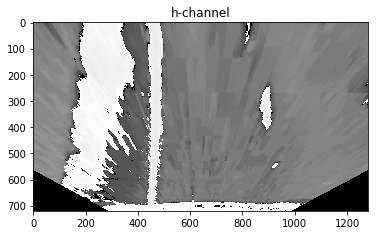

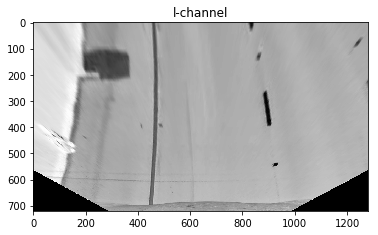

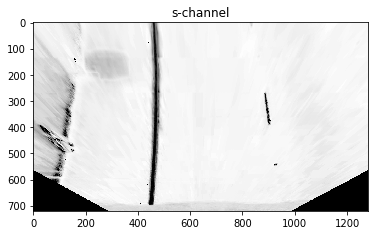

In [545]:
plt.imshow(h_channel_color, cmap="gray")
plt.title ("h-channel")
plt.show()

plt.imshow(l_channel_color, cmap="gray")
plt.title ("l-channel")
plt.show()

plt.imshow(s_channel_color, cmap="gray")
plt.title ("s-channel")
plt.show()



### S-channel Threshold

In [546]:
s_thresh_min = 70
s_thresh_max = 255
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1


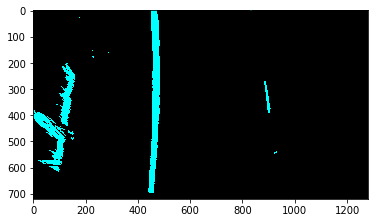

In [547]:
temp = np.dstack((np.zeros_like(s_channel),s_binary,s_binary)) #*255
plt.imshow(temp,cmap="gray")
plt.show()

#### combining together s-channel threshold and soebel x 

In [548]:
final = np.dstack( (np.zeros_like(s_binary), s_binary, soebelx_binary))

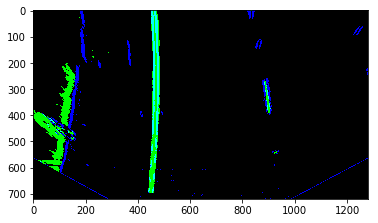

In [549]:
plt.imshow(final, cmap="gray")

plt.show()

### Trying SoebelX on  the S-channel 

In [550]:
# Sobel x
sobelx_s_channel = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx_s_channel = np.absolute(sobelx_s_channel) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx_s_channel/np.max(abs_sobelx_s_channel))

# Threshold x gradient
thresh_min = 15

thresh_max = 200
soebelx_s_channel_binary = np.zeros_like(scaled_sobel)
soebelx_s_channel_binary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1


In [551]:
temp = np.dstack((soebelx_s_channel_binary,soebelx_s_channel_binary,soebelx_s_channel_binary))*255
temp.shape

(720, 1280, 3)

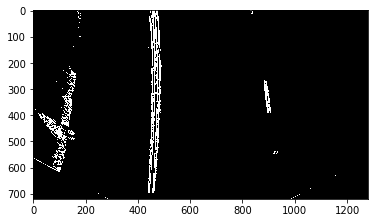

In [552]:
plt.imshow(temp)
plt.show()

### Merging  
#### 1) the S-channel threshold     
#### 2) Soebel X on gray     
#### 3) Soebel X on S-CHANNEL

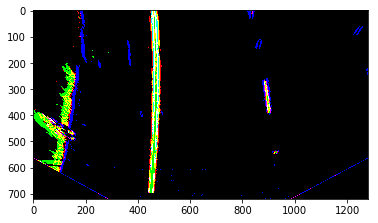

In [553]:
final = np.dstack( (soebelx_s_channel_binary, s_binary, soebelx_binary))
plt.imshow(final)
plt.show()

### defining Pipeline function

In [554]:
# Edit this function to create your own pipeline.
def pipeline(input_img, s_thresh=(140, 255), sx_thresh=(140, 255)):

    ####
    # Sobel x on gray image
    ####
    gray = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold x gradient
    thresh_min = 15
    thresh_max = 100
    soebelx_binary = np.zeros_like(scaled_sobel)
    soebelx_binary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1


    ####
    # s-channel ( HLS ) threshold
    ####
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(area_of_interest, cv2.COLOR_RGB2HLS).astype(np.float)
    h_channel = hls[:,:,0]
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]

    s_thresh_min = 70
    s_thresh_max = 255
#     s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

    ###
    ### Trying SoebelX on  the S-channel 
    ###
    # Sobel x
    sobelx_s_channel = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx_s_channel = np.absolute(sobelx_s_channel) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx_s_channel/np.max(abs_sobelx_s_channel))

    # Threshold x gradient
    thresh_min = 30
    thresh_max = 200
    soebelx_s_channel_binary = np.zeros_like(scaled_sobel)
    soebelx_s_channel_binary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    ####
    ### Combining everything together
    ####
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(soebelx_binary == 1) | ( (s_binary == 1) & (soebelx_s_channel_binary ==1 ))] = 1
#     combined_binary = combined_binary*255
    return combined_binary, soebelx_binary , s_binary , soebelx_s_channel_binary

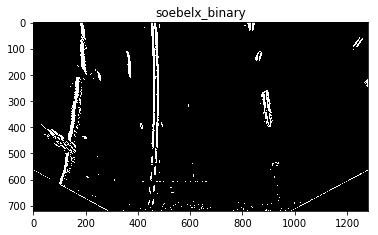

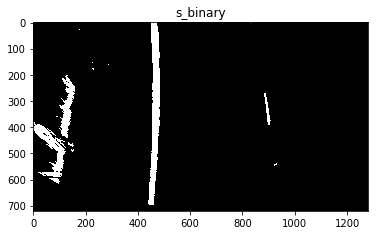

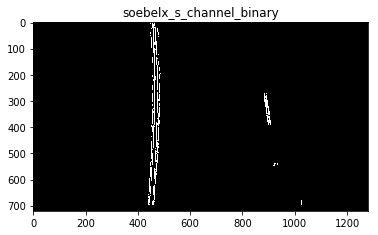

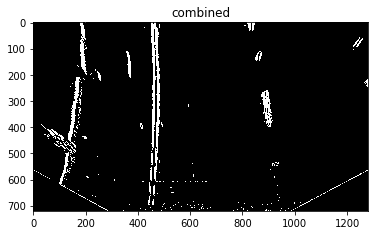

In [556]:
pipelined , soebelx_binary , s_binary , soebelx_s_channel_binary = pipeline(warped)

temp = np.dstack((soebelx_binary,soebelx_binary,soebelx_binary))*255
plt.imshow(temp, cmap="gray")
plt.title ("soebelx_binary")
plt.show()

temp = np.dstack((s_binary,s_binary,s_binary)) #*255
plt.imshow(temp, cmap="gray")
plt.title ("s_binary")
plt.show()

temp = np.dstack((soebelx_s_channel_binary,soebelx_s_channel_binary,soebelx_s_channel_binary))*255
plt.imshow(temp, cmap="gray")
plt.title ("soebelx_s_channel_binary")
plt.show()

temp = np.dstack((pipelined,pipelined,pipelined))*255
plt.imshow(temp, cmap="gray")
plt.title ("combined")
plt.show()




# Line Finding Method: Peaks in a Histogram

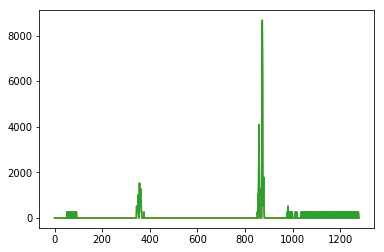

In [557]:
import numpy as np
histogram = np.sum(pipelined_color[pipelined_color.shape[0]//2:,:], axis=0)
plt.plot(histogram)
plt.show()

In [558]:
area_of_interest.shape

(720, 1280, 3)

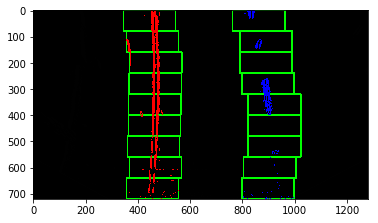

In [559]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_lane_find(input_image):
    # Assuming you have created a warped binary image called "binary_warped"
    # Take a histogram of the bottom half of the image
    histogram = np.sum(input_image[input_image.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((input_image, input_image, input_image))
#     out_img = np.copy(input_image)
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
#     print ( "midpoint = " + str(midpoint ))
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
#     print ( "leftx_base = " + str(leftx_base ))
#     print ( "rightx_base = " + str(rightx_base ))

    # Choose the number of sliding windows
    nwindows = 9
    # Set height of windows
    window_height = np.int(input_image.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = input_image.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = input_image.shape[0] - (window+1)*window_height
        win_y_high = input_image.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        
#         print ( "win_xleft_low = " + str(win_xleft_low))
#         print ( "win_y_low = " + str(win_y_low))
#         print ( "win_xleft_high = " + str(win_xleft_high))
#         print ( "win_y_high = " + str(win_y_high))
        
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
        (0,255,0), 4) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
        (0,255,0), 5) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, undst.shape[0]-1, undst.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0 ]

    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    return  out_img , left_fitx , right_fitx

out_img , left_fitx , right_fitx= histogram_lane_find (pipelined)
# # Fit a second order polynomial to each

plt.imshow(out_img)
plt.show()



In [560]:
warped.shape[1]

1280

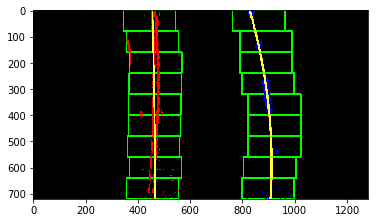

In [561]:
def draw_polyfit( input_image, left_fitx, right_fitx):
    temp = np.copy(input_image)

    for y, x  in enumerate(left_fitx):
        if x > 0 and x <  input_image.shape[1]:
            yellow = [255,255,51]
            temp[y,int(x) ] = yellow
            if x < temp.shape[1] - 5:
                temp[y,int(x) +1 ] = yellow
                temp[y,int(x) +2 ] = yellow
                temp[y,int(x) +3 ] = yellow
                temp[y,int(x) +4 ] = yellow
            if x > 5:    
                temp[y,int(x) -1 ] = yellow
                temp[y,int(x) -2 ] = yellow

    for y, x  in enumerate(right_fitx):
        if x > 0 and x <  input_image.shape[1]:
            yellow = [255,255,51]
            temp[y,int(x) ] = yellow
            if x < temp.shape[1] - 5:
                temp[y,int(x) +1 ] = yellow
                temp[y,int(x) +2 ] = yellow
                temp[y,int(x) +3 ] = yellow
                temp[y,int(x) +4 ] = yellow
            if x > 5:    
                temp[y,int(x) -1 ] = yellow
                temp[y,int(x) -2 ] = yellow
                temp[y,int(x) -3 ] = yellow
                temp[y,int(x) -4 ] = yellow

    return temp

plt.imshow(draw_polyfit(out_img, left_fitx, right_fitx))
plt.show()

In [562]:
temp.shape[1]

1280

# SLIDING WINDOW SEARCH

In [563]:
# def window_mask(width, height, img_ref, center,level):
#     output = np.zeros_like(img_ref)
#     output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
#     return output


In [564]:
# def find_window_centroids(image, window_width, window_height, margin):
    
#     window_centroids = [] # Store the (left,right) window centroid positions per level
#     window = np.ones(window_width) # Create our window template that we will use for convolutions
    
#     # First find the two starting positions for the left and right lane by using np.sum to get the vertical image slice
#     # and then np.convolve the vertical image slice with the window template 
    
#     # Sum quarter bottom of image to get slice, could use a different ratio
#     l_sum = np.sum(image[int(3*image.shape[0]/4):,:int(image.shape[1]/2)], axis=0)
    
# #     print ("window = " + str(window) )
# #     print ("l_sum.shape = " + str(l_sum.shape) )
# #     print ("l_sum = " + str(l_sum) )
    
# #     print ("np.convolve(window,l_sum) " + str(np.convolve(window,l_sum)) )
#     l_center = np.argmax(np.convolve(window,l_sum))-window_width/2
# #     print ("l_center = " + str(l_center) )
    
#     r_sum = np.sum(image[int(3*image.shape[0]/4):,int(image.shape[1]/2):], axis=0)
#     r_center = np.argmax(np.convolve(window,r_sum))-window_width/2+int(image.shape[1]/2)
    
#     # Add what we found for the first layer
#     window_centroids.append((l_center,r_center))
    
#     # Go through each layer looking for max pixel locations
#     for level in range(1,(int)(image.shape[0]/window_height)):
#         # convolve the window into the vertical slice of the image
# 	    image_layer = np.sum(image[int(image.shape[0]-(level+1)*window_height):int(image.shape[0]-level*window_height),:], axis=0)
# 	    conv_signal = np.convolve(window, image_layer)
# 	    # Find the best left centroid by using past left center as a reference
# 	    # Use window_width/2 as offset because convolution signal reference is at right side of window, not center of window
# 	    offset = window_width/2
# 	    l_min_index = int(max(l_center+offset-margin,0))
# 	    l_max_index = int(min(l_center+offset+margin,image.shape[1]))
# 	    l_center = np.argmax(conv_signal[l_min_index:l_max_index])+l_min_index-offset
# 	    # Find the best right centroid by using past right center as a reference
# 	    r_min_index = int(max(r_center+offset-margin,0))
# 	    r_max_index = int(min(r_center+offset+margin,image.shape[1]))
# 	    r_center = np.argmax(conv_signal[r_min_index:r_max_index])+r_min_index-offset
# 	    # Add what we found for that layer
# 	    window_centroids.append((l_center,r_center))

#     return window_centroids

In [565]:
# def draw_windows(input_image, window_width, window_height, margin):
#     window_centroids = find_window_centroids(input_image, window_width, window_height, margin)
#     r_points = []
#     l_points = []
#     # If we found any window centers
#     if len(window_centroids) > 0:
#         # Points used to draw all the left and right windows
#         l_points = np.zeros_like(input_image)
#         r_points = np.zeros_like(input_image)

#         # Go through each level and draw the windows 	
#         for level in range(0,len(window_centroids)):
#             # Window_mask is a function to draw window areas
#             l_mask = window_mask(window_width,window_height,input_image,window_centroids[level][0],level)
#             r_mask = window_mask(window_width,window_height,input_image,window_centroids[level][1],level)
#             # Add graphic points from window mask here to total pixels found 
#             l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
#             r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255
#     #         plt.imshow(l_mask)
#     #         plt.show()


#         # Draw the results
#         template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
#         zero_channel = np.zeros_like(template) # create a zero color channel
#         template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
#         warpage= np.dstack((input_image, input_image, input_image)) # making the original road pixels 3 color channels
# #         print (zero_channel.shape)
#         output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results
# #         output   = warpage

#     # If no window centers found, just display orginal road image
#     else:
#         output = np.array(cv2.merge((input_image,input_image,input_image)),np.uint8)
    
#     return (output, r_points, l_points, template)

#  # window settings
# window_width = 50 
# window_height = 80 # Break image into 9 vertical layers since image height is 720
# margin = 100 # How much to slide left and right for searching

                 
# # Display the final results
# # plt.imshow(warped)
# print (pipelined.shape)
# drawed_windows, l_points, r_points, template = draw_windows( pipelined,window_width, window_height,margin)
# plt.imshow(drawed_windows,cmap="gray")
# plt.title('window fitting results')
# plt.show()


In [566]:
# right_cutted = cv2.bitwise_and(pipelined, r_points) #, mask=template[:,:,0])
# left_cutted = cv2.bitwise_and(pipelined, l_points) #, mask=template[:,:,0])

# plt.imshow(cv2.bitwise_or(left_cutted, right_cutted),cmap="gray")
# plt.show()


In [567]:
# def polyfit_lanes(image, l_points, r_points ):
    
#     ## fit the right and left lane into second order polynomial
#     right_cutted = cv2.bitwise_and(image, r_points)
#     right_nonzero_y = right_cutted.nonzero()[0]
#     right_nonzero_x = right_cutted.nonzero()[1]
#     right_fit = np.polyfit(right_nonzero_y, right_nonzero_x, 2)
#     right_fitx = right_fit[0]*(right_nonzero_y**2 ) + right_fit[1]*right_nonzero_y +  right_fit[2]

#     left_cutted = cv2.bitwise_and(image, l_points)
#     left_nonzero_y = left_cutted.nonzero()[0]
#     left_nonzero_x = left_cutted.nonzero()[1]
#     left_fit       = np.polyfit(left_nonzero_y, left_nonzero_x, 2)
#     left_fitx      = left_fit[0]*(left_nonzero_y**2 ) + left_fit[1]*left_nonzero_y +  left_fit[2]

#     return left_fitx, right_fitx, left_nonzero_y, right_nonzero_y, left_cutted, right_cutted

# left_fitx, right_fitx, left_nonzero_y, right_nonzero_y ,left_cutted, right_cutted = \
#                 polyfit_lanes(pipelined, l_points, r_points )

# plt.plot(right_fitx, right_nonzero_y, color='green', linewidth=3)
# plt.plot(left_fitx, left_nonzero_y, color='green', linewidth=3)
# plt.imshow(cv2.bitwise_or(left_cutted, right_cutted), cmap="gray")
# plt.ylim((0,720))
# plt.xlim((0,1280))
# plt.gca().invert_yaxis() # to visualize as we do the images
# plt.show()



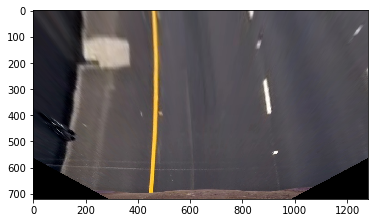

In [568]:
plt.imshow(warped)
plt.show()

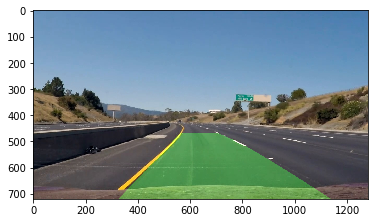

In [569]:
def draw_area_and_warpback(ori_undst_img, warped_img ,left_fitx, right_fitx, Minv ):
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped_img).astype(np.uint8)
#     color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    # Recast the x and y points into usable format for cv2.fillPoly()
    ploty = np.linspace(0, warped_img.shape[0]-1, warped_img.shape[0] )
    
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(warp_zero, np.int_([pts]), (0,255, 0))

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(warp_zero, Minv, (warped_img.shape[1], warped_img.shape[0])) 
    # Combine the result with the original image
    result = newwarp
    result = cv2.addWeighted(ori_undst_img, 1, newwarp, 0.3, 0)
    
    return result

plt.imshow(draw_area_and_warpback(undst, warped,left_fitx, right_fitx, Minv))
plt.show()

In [ ]:
newwarp.shape

## Working on the video

In [577]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None


In [578]:
left_line = Line()
right_line = Line()


In [359]:
def draw_processing_inlay(final, out_img, text, lay_number, left_or_right_pos) :
        # Add the processing window. Shows Histogram fitting errors
        font = cv2.FONT_HERSHEY_SIMPLEX
#         fit_errors = "L: {:0.4f}  R: {:0.4f}".format(np.sum(left_line.current_fit_error**2),np.sum(right_line.current_fit_error**2))
        out_img = cv2.resize(out_img,(int(320*.6),int(240*.6)))
        out_img = cv2.putText(out_img,text,(10,30), font, .5,(255,255,255),1,lineType = cv2.LINE_AA)
        
        if left_or_right_pos == "left":
            x_offset =  20
        else:
            x_offset = final.shape[1]- 230
            
        y_offset = 25 + 150* (lay_number - 1)
        final[y_offset:y_offset+out_img.shape[0], x_offset:x_offset+out_img.shape[1]] = out_img
        return final

In [621]:
from PIL import Image

def process_image(input_img):
    #######    
    ## undistort the image based on previous Camera Calibration
    #######
    undst = cv2.undistort(input_img, mtx, dist, None, mtx)

    undst = cv2.GaussianBlur(undst, (3, 3), 0)

    #######    
    ## determine the image dimension 
    #######
    x_len = input_img.shape [1]
    y_len = input_img.shape [0]
    
    #######    
    ## calculate the source points for image warp ( bird eyes view )
    #######    
    src_top_left     = [int(0.4453125*x_len),int(0.62*y_len)]
    src_top_right    = [int(0.5278125*x_len),int(0.62*y_len)]

    src_bottom_left  = [int(0.19171875*x_len),y_len]
    src_bottom_right = [int(0.92*x_len),y_len]

    src_corners = np.float32([src_top_left,
                          src_top_right,
                          src_bottom_right,
                          src_bottom_left])
    

    #######    
    ## calculate the destination points for image warp ( bird eyes view )
    #######    
    dst_bottom_left = [int(.33*x_len),y_len] 
    dst_bottom_right = [int(0.725*x_len), y_len]

    dst_top_left = [int(.345*x_len), 1]
    dst_top_right = [int(0.71875*x_len), 1]

    dst_corners = np.float32([dst_top_left,
                              dst_top_right,
                              dst_bottom_right, 
                              dst_bottom_left
                             ])

    
    #######    
    ## bird eyes ( perspective transform ) using the undistorted image 
    ## getting back the perspective transform Matrix and the Inverse Matrix () Minv )
    #######    
    drawed_poly = draw_poly(undst, src_corners )
    bird_eyes_img_draw, M_draw, Minv_draw = bird_eyes( drawed_poly, src_corners, dst_corners)    
    
    bird_eyes_img, M, Minv = bird_eyes( undst, src_corners, dst_corners)    

    #######    
    ## masking the image
    #######
    masked_image = region_of_interest (bird_eyes_img)
    masked_image [ undst.shape[1]-22 :,:] = [0,0,0]


    #######    
    ## Combined Thresholds
    #######    
    combined_thresholds_binary , soebelx_binary , s_binary , soebelx_s_channel_binary = pipeline(masked_image)

    gray_image = cv2.cvtColor(undst, cv2.COLOR_BGR2GRAY)
    # Calculating the median Value
    median_value = np.median(gray_image)

    gray_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

    #Canny edge detection parameters
    low_threshold = 10 #0.36*median_value
    high_threshold = 50 #1.33*median_value    
    
    canny = cv2.Canny(gray_image, low_threshold, high_threshold)
    
    #######    
    ## sliding window using histogram
    #######    
    
    out_img_histo , left_fitx , right_fitx= histogram_lane_find (combined_thresholds_binary)
    
    out_img_histo = draw_polyfit(out_img_histo, left_fitx, right_fitx)
    #######    
    ## cutting only what is inside of the sliding windows 
    #######    
    
#     left_fitx, right_fitx, left_nonzero_y, right_nonzero_y , left_cutted, right_cutted \
#                     = polyfit_lanes(combined_thresholds, l_points, r_points )

#     cutted_image = cv2.bitwise_or(left_cutted, right_cutted)
# #     print (" cutted_image.shape" + str(cutted_image.shape))
# #     print (" template.shape" + str(template.shape))
#     cutted_image = cv2.addWeighted(np.dstack((cutted_image, cutted_image, cutted_image)), 1, template, 0.5, 0.0) # overlay the orignal road image with window results
    # Display the final results
#     print ( find_window_centroids(possible_lines, window_width, window_height, margin))
#     windows_image = draw_windows(original,window_width, window_height,margin)

    #######    
    ## copy the input image into the final 
    #######    
#     final = np.copy ( input_img)
    final = draw_area_and_warpback(undst, bird_eyes_img,left_fitx, right_fitx,Minv )
    #######    
    ## insert a box inside of the original image with the bird eyes view 
    #######    
    final = draw_processing_inlay(final, bird_eyes_img, "Bird Eyes", 1, "left")   
    final = draw_processing_inlay(final, masked_image, "Area of Interest", 2, "left")   
#     final = draw_processing_inlay(final, bird_eyes_img, "Bird eyes", 1)   
#     final = draw_processing_inlay(final, cv2.cvtColor(combined_thresholds_color, cv2.COLOR_BGR2GRAY), "Lane lines", 2)   
#     final = draw_processing_inlay(final, drawed_windows, "Lane lines", 2)   

    combined_thresholds_color = np.dstack((combined_thresholds_binary,\
                                           combined_thresholds_binary,\
                                           combined_thresholds_binary))*255
    final = draw_processing_inlay(final,combined_thresholds_color, "Combined thresholds", 3, "left")   
    final = draw_processing_inlay(final,out_img_histo, "Windows sliding", 4, "left")   

    temp = np.dstack((soebelx_binary,soebelx_binary,soebelx_binary))*255
    final = draw_processing_inlay(final,temp, "Soebel X", 1, "right")   

    final = draw_processing_inlay(final,drawed_poly, "Poly draw", 2, "right")   

    final = draw_processing_inlay(final,bird_eyes_img_draw, "bird_eyes_img_draw", 3, "right")   

    
    temp = np.dstack((canny,canny,canny))
    final = draw_processing_inlay(final,temp, "canny", 4, "right")   

    return final

In [623]:
from moviepy.editor import VideoFileClip
output_video_name = 'project_video_output.mp4'
clip1 = VideoFileClip("project_video.mp4")
clip2 = clip1.subclip(4,6)
output_video = clip2.fl_image(process_image) #NOTE: this function expects color images!!

%time output_video.write_videofile(output_video_name, audio=False)


[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


 98%|█████████▊| 50/51 [00:05<00:00,  8.25it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 15.8 s, sys: 152 ms, total: 16 s
Wall time: 6.74 s


# Measuring Curvature

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

print ("leftx.shape {}".format(leftx.shape))
print ("rightx.shape {}".format(rightx.shape))
leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


# Fit a second order polynomial to pixel
positions in each fake lane line
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images
plt.show()

In [ ]:
left_fit

In [ ]:
leftx.shape

In [ ]:
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)

In [ ]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

In [ ]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (test_image.shape[1], test_image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undst, 1, newwarp, 0.3, 0)
plt.imshow(color_warp)
plt.show()

In [ ]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # was the line detected in the last iteration?
        self.detected = False  
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        #polynomial coefficients for the most recent fit
        self.current_fit = [np.array([False])]  
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        #x values for detected line pixels
        self.allx = None  
        #y values for detected line pixels
        self.ally = None